In [51]:
#libraries
import numpy as np 
import pandas as pd 
import os
import json
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import time
import datetime
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import gc
import random
import warnings
warnings.filterwarnings("ignore")
from functools import partial
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)
pd.set_option('max_rows', 100)
import os
import scipy as sp
from math import sqrt
from collections import Counter
from sklearn.metrics import confusion_matrix as sk_cmatrix

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display 

from sklearn.metrics import cohen_kappa_score
def kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

In [52]:
breeds = pd.read_csv('./all/breed_labels.csv')
colors = pd.read_csv('./all/color_labels.csv')
states = pd.read_csv('./all/state_labels.csv')

data = pd.read_csv('./all/train.csv')

all_data = data

In [54]:
data['Breed1'] = data['Breed1'].map(breeds.set_index('BreedID')['BreedName'])
data['Breed2'] = data['Breed2'].map(breeds.set_index('BreedID')['BreedName'])

data['State'] = data['State'].map(states.set_index('StateID')['StateName'])

data['Color1'] = data['Color1'].map(colors.set_index('ColorID')['ColorName'])
data['Color2'] = data['Color2'].map(colors.set_index('ColorID')['ColorName'])
data['Color3'] = data['Color3'].map(colors.set_index('ColorID')['ColorName'])

genderDict = {1:'Male', 2:'Female', 3:'Mixed'}
typeDict = {1:'Dog', 2:'Cat'}
maturityDict = {1: 'Small', 2: 'Medium', 3: 'Large', 4: 'Extra Large', 0: 'Not Specified'}
healthDict = {1:'Healthy', 2:'Minor Injury', 3:'Serious Injury', 0:'Not Specified'}
furDict = {1: 'Short', 2: 'Medium', 3: 'Long', 0: 'Not Specified'}

data['Gender'] = data['Gender'].map(genderDict)
data['Type'] = data['Type'].map(typeDict)
data['MaturitySize'] = data['MaturitySize'].map(maturityDict)
data['Health'] = data['Health'].map(healthDict)
data['FurLength'] = data['FurLength'].map(furDict)

In [55]:
data_label = data.AdoptionSpeed
data = data.drop('AdoptionSpeed', axis=1)

In [56]:
data

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt
0,Cat,Nibble,3,Tabby,NaN,Male,Black,White,NaN,Small,Short,2,2,2,Healthy,1,100,Selangor,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care.,86e1089a3,1.0
1,Cat,No Name Yet,1,Domestic Medium Hair,NaN,Male,Black,Brown,NaN,Medium,Medium,3,3,3,Healthy,1,0,Kuala Lumpur,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartment. It was shaking so I had to bring it home to provide temporary care.,6296e909a,2.0
2,Dog,Brisco,1,Mixed Breed,NaN,Male,Brown,White,NaN,Medium,Medium,1,1,2,Healthy,1,0,Selangor,fa90fa5b1ee11c86938398b60abc32cb,0,"Their pregnant mother was dumped by her irresponsible owner at the roadside near some shops in Subang Jaya. Gave birth to them at the roadside. They are all healthy and adorable puppies. Already dewormed, vaccinated and ready to go to a home. No tying or caging for long hours as guard dogs. However, it is acceptable to cage or tie for precautionary purposes. Interested to adopt pls call me.",3422e4906,7.0
3,Dog,Miko,4,Mixed Breed,NaN,Female,Black,Brown,NaN,Medium,Short,1,1,2,Healthy,1,150,Kuala Lumpur,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience waiting for her good master, plz call or sms for more details if you really get interested, thanks!!",5842f1ff5,8.0
4,Dog,Hunter,1,Mixed Breed,NaN,Male,Black,NaN,NaN,Medium,Short,2,2,2,Healthy,1,0,Selangor,95481e953f8aed9ec3d16fc4509537e8,0,"This handsome yet cute boy is up for adoption. He is the most playful pal we've seen in our puppies. He loves to nibble on shoelaces , Chase you at such a young age. Imagine what a cute brat he will be when he grows. We are looking for a loving home for Hunter , one that will take care of him and give him the love that he needs. Please call urgently if you would like to adopt this cutie.",850a43f90,3.0
5,Cat,NaN,3,Domestic Short Hair,NaN,Female,Cream,Gray,NaN,Medium,Short,2,2,2,Healthy,1,0,Selangor,22fe332bf9c924d4718005891c63fbed,0,"This is a stray kitten that came to my house. Have been feeding it, but cannot keep it.",d24c30b4b,2.0
6,Cat,BULAT,12,Domestic Long Hair,Domestic Long Hair,Male,Black,NaN,NaN,Medium,Long,2,2,3,Healthy,1,300,Selangor,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who interested to adopt my cat can contact my father at this number (mazuvil)or can just email me. currently bulat is at my hometown at perak but anyone outside the area still want to adopt can travel there to my hometown.there is a lot of cats in my house rite now..i think i should let one of them go to a better owner who can give better attention to him.,1caa6fcdb,3.0
7,Dog,Siu Pak & Her 6 Puppies,0,Mixed Breed,NaN,Female,Black,Brown,White,Medium,Short,2,2,2,Healthy,6,0,Selangor,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies. Interested pls call or sms me. Left 2female puppies on 2/7/10,97aa9eeac,9.0
8,Cat,NaN,2,Domestic Medium Hair,NaN,Female,Gray,NaN,NaN,Medium,Medium,2,2,2,Healthy,1,0,Selangor,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in neighbours' garden. Not sure of sex.",c06d167ca,6.0
9,Cat,Kitty,12,Domestic Medium Hair,NaN,Female,Black,White,NaN,Medium,Medium,3,3,3,Healthy,1,0,Selangor,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we would really like to find a home for it because we cannot keep her for ourselves for long. Has a very cute high pitch but soft meow. Please contact me if you would be interested in adopting.",7

In [57]:
from sklearn.model_selection import train_test_split
train, test, train_label, test_label = train_test_split(data, data_label, test_size=0.5, random_state=9)

In [58]:
train.drop('Description', axis=1).head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,PetID,PhotoAmt
9248,Dog,Samuel,7,Mixed Breed,NaN,Male,Black,Brown,White,Medium,Medium,1,1,2,Healthy,1,0,Johor,6b95e9857d1373e422912448be807f0f,0,83502a253,1.0
1592,Dog,Roxy,36,Jack Russell Terrier,NaN,Female,Brown,White,NaN,Small,Medium,3,3,3,Healthy,1,0,Selangor,0d86035d2266358c196cb69596a798ea,0,24993107f,5.0
5685,Cat,NaN,3,Domestic Short Hair,NaN,Female,Black,NaN,NaN,Small,Short,2,2,2,Healthy,1,0,Kuala Lumpur,92b7a054c5127672603ed7f42c5571e0,0,e96d122ed,1.0
10041,Cat,Simba & Sugar,2,Siamese,NaN,Mixed,Brown,Cream,White,Small,Medium,2,1,2,Healthy,2,0,Selangor,a889a765a2f15aa5cae05f775347d1d5,0,8e6223402,6.0
10313,Dog,Mokki,4,Mixed Breed,NaN,Female,Black,White,NaN,Medium,Medium,1,1,2,Healthy,1,0,Kuala Lumpur,9e5c96154eff0870eb830d6162d687dd,0,58d54417f,1.0


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7496 entries, 9248 to 8574
Data columns (total 23 columns):
Type            7496 non-null object
Name            6888 non-null object
Age             7496 non-null int64
Breed1          7494 non-null object
Breed2          2123 non-null object
Gender          7496 non-null object
Color1          7496 non-null object
Color2          5280 non-null object
Color3          2207 non-null object
MaturitySize    7496 non-null object
FurLength       7496 non-null object
Vaccinated      7496 non-null int64
Dewormed        7496 non-null int64
Sterilized      7496 non-null int64
Health          7496 non-null object
Quantity        7496 non-null int64
Fee             7496 non-null int64
State           7496 non-null object
RescuerID       7496 non-null object
VideoAmt        7496 non-null int64
Description     7492 non-null object
PetID           7496 non-null object
PhotoAmt        7496 non-null float64
dtypes: float64(1), int64(7), object(15)
memo

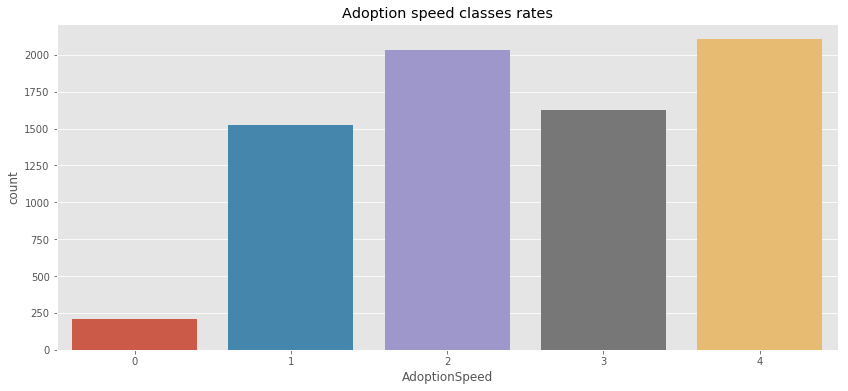

In [60]:
plt.figure(figsize=(14, 6));
g = sns.countplot(x=train_label, data=train);
plt.title('Adoption speed classes rates');
ax=g.axes

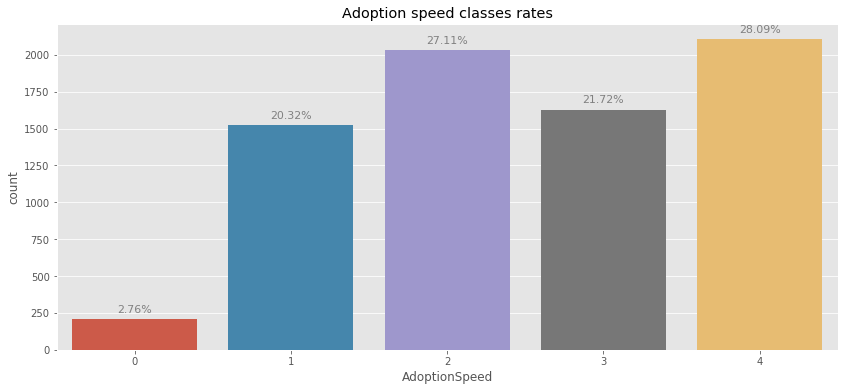

In [61]:
plt.figure(figsize=(14, 6));
g = sns.countplot(x=train_label, data=train)
plt.title('Adoption speed classes rates');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / train.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points')  

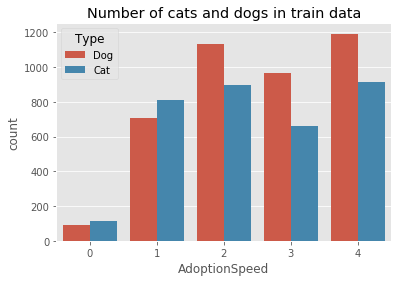

In [62]:
sns.countplot(x=train_label, data=train, hue='Type');
plt.title('Number of cats and dogs in train data');

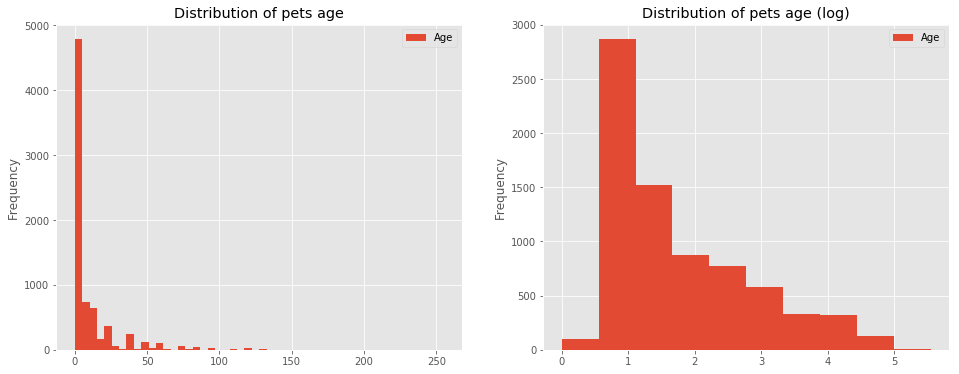

In [63]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.title('Distribution of pets age');
train['Age'].plot('hist', bins=50);
plt.legend();

plt.subplot(1, 2, 2)
plt.title('Distribution of pets age (log)');
np.log1p(train['Age']).plot('hist');
plt.legend();

In [64]:
train['AdoptionSpeed'] = train_label

In [39]:
#import langdetect
#import eli5
from wordcloud import WordCloud
import lightgbm as lgb
#import xgboost as xgb
#from catboost import CatBoostClassifier
#from tqdm import tqdm_notebook
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [65]:

t = []
for a in range(5):
    df = train.loc[train['AdoptionSpeed'] == a]

    t.append(go.Scatter(
        x = df['Age'].value_counts().sort_index().index,
        y = df['Age'].value_counts().sort_index().values,
        name = str(a)
    ))
    
layout = go.Layout(dict(title = "AdoptionSpeed trends by Age",
                  xaxis = dict(title = 'Age (months)'),
                  yaxis = dict(title = 'Counts'),
                  )
                  )
py.iplot(dict(data=t, layout=layout), filename='basic-line')



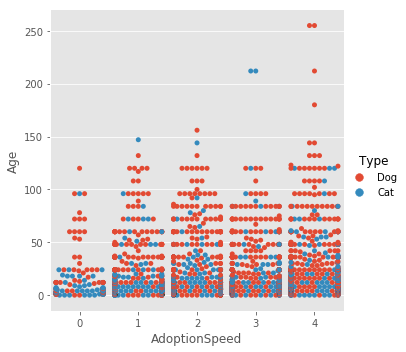

In [69]:
sns.catplot(x="AdoptionSpeed", y="Age", hue="Type", kind="swarm", data=train);

In [66]:
main_count = train['AdoptionSpeed'].value_counts(normalize=True).sort_index()
def prepare_plot_dict(df, col, main_count):
    """
    Preparing dictionary with data for plotting.
    
    I want to show how much higher/lower are the rates of Adoption speed for the current column comparing to base values (as described higher),
    At first I calculate base rates, then for each category in the column I calculate rates of Adoption speed and find difference with the base rates.
    
    """
    main_count = dict(main_count)
    plot_dict = {}
    for i in df[col].unique():
        val_count = dict(df.loc[df[col] == i, 'AdoptionSpeed'].value_counts().sort_index())

        for k, v in main_count.items():
            if k in val_count:
                plot_dict[val_count[k]] = ((val_count[k] / sum(val_count.values())) / main_count[k]) * 100 - 100
            else:
                plot_dict[0] = 0

    return plot_dict

def make_count_plot(df, x, hue='AdoptionSpeed', title='', main_count=main_count):
    """
    Plotting countplot with correct annotations.
    """
    g = sns.countplot(x=x, data=df, hue=hue);
    plt.title(f'AdoptionSpeed {title}');
    ax = g.axes

    plot_dict = prepare_plot_dict(df, x, main_count)

    for p in ax.patches:
        h = p.get_height() if str(p.get_height()) != 'nan' else 0
        text = f"{plot_dict[h]:.0f}%" if plot_dict[h] < 0 else f"+{plot_dict[h]:.0f}%"
        ax.annotate(text, (p.get_x() + p.get_width() / 2., h),
             ha='center', va='center', fontsize=11, color='green' if plot_dict[h] > 0 else 'red', rotation=0, xytext=(0, 10),
             textcoords='offset points')  

def make_factor_plot(df, x, col, title, main_count=main_count, hue=None, ann=True, col_wrap=4):
    """
    Plotting countplot.
    Making annotations is a bit more complicated, because we need to iterate over axes.
    """
    if hue:
        g = sns.factorplot(col, col=x, data=df, kind='count', col_wrap=col_wrap, hue=hue);
    else:
        g = sns.factorplot(col, col=x, data=df, kind='count', col_wrap=col_wrap);
    plt.subplots_adjust(top=0.9);
    plt.suptitle(title);
    ax = g.axes
    plot_dict = prepare_plot_dict(df, x, main_count)
    if ann:
        for a in ax:
            for p in a.patches:
                text = f"{plot_dict[p.get_height()]:.0f}%" if plot_dict[p.get_height()] < 0 else f"+{plot_dict[p.get_height()]:.0f}%"
                a.annotate(text, (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='green' if plot_dict[p.get_height()] > 0 else 'red', rotation=0, xytext=(0, 10),
                     textcoords='offset points') 

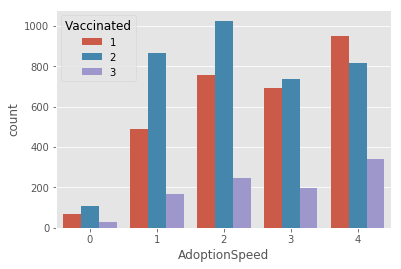

In [67]:
sns.countplot(x=train_label, data=train, hue='Vaccinated');

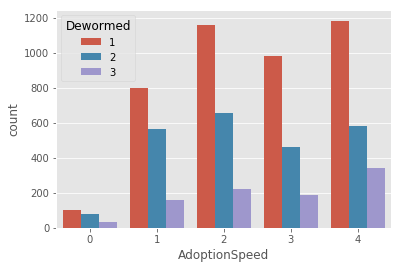

In [49]:
sns.countplot(x=train_label, data=train, hue='Dewormed');

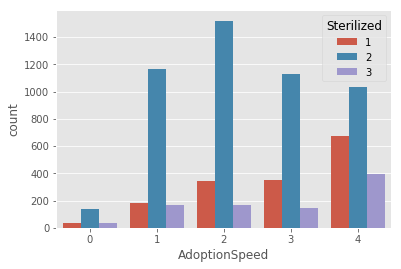

In [50]:
sns.countplot(x=train_label, data=train, hue='Sterilized');

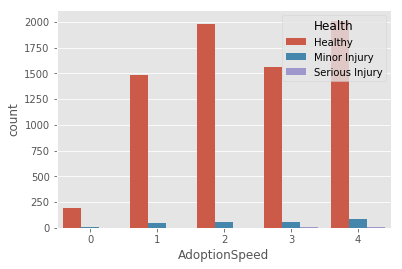

In [71]:
sns.countplot(x=train_label, data=train, hue='Health');

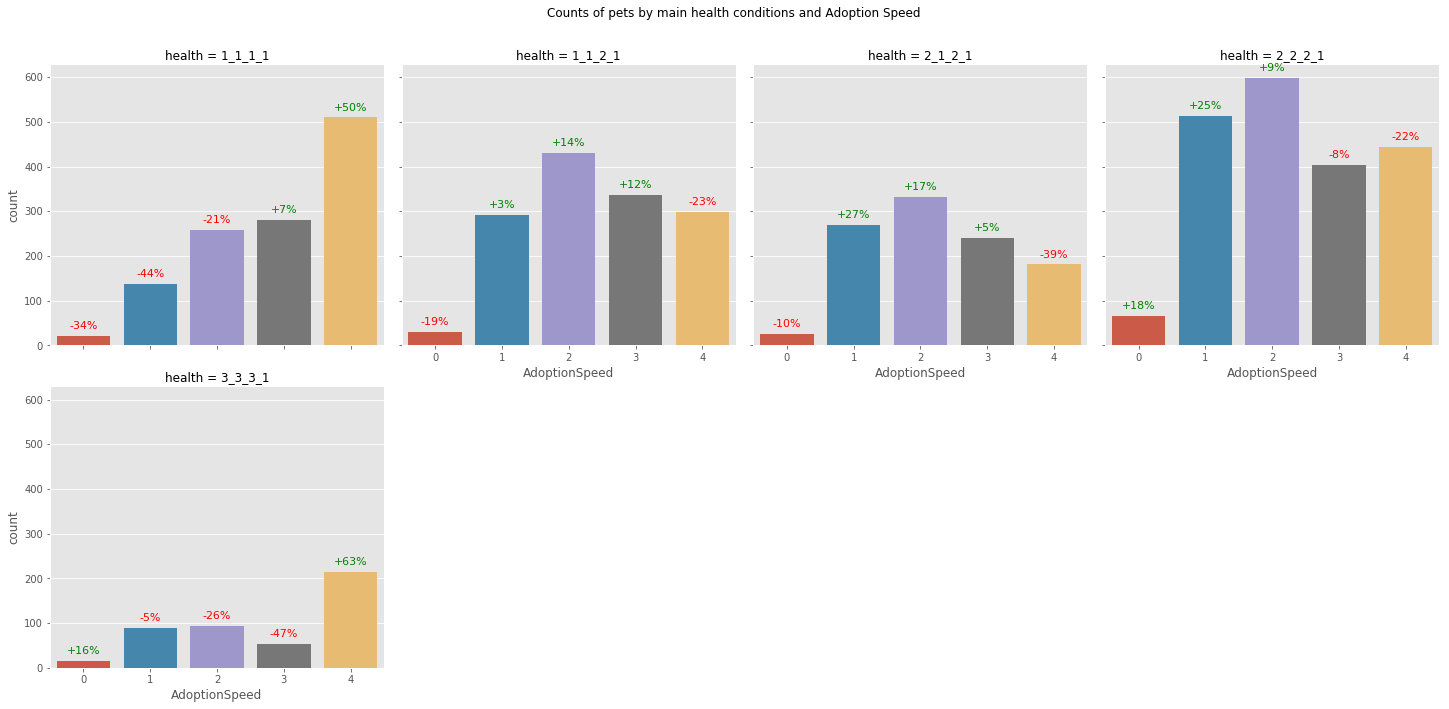

In [47]:
train['health'] = train['Vaccinated'].astype(str) + '_' + train['Dewormed'].astype(str) + '_' + train['Sterilized'].astype(str) + '_' + train['Health'].astype(str)
test['health'] = test['Vaccinated'].astype(str) + '_' + test['Dewormed'].astype(str) + '_' + test['Sterilized'].astype(str) + '_' + test['Health'].astype(str)


make_factor_plot(df=train.loc[train['health'].isin(list(train.health.value_counts().index[:5]))], x='health', col='AdoptionSpeed', title='Counts of pets by main health conditions and Adoption Speed')

In [2]:
pet_data

NameError: name 'pet_data' is not defined